In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv(r"C:\Users\BEBO\Desktop\New folder\titanic2.csv")


In [18]:
print(data.head(3))

   pclass  survived                            name     sex      age  sibsp  \
0       1         1   Allen, Miss. Elisabeth Walton  female  29.0000      0   
1       1         1  Allison, Master. Hudson Trevor    male   0.9167      1   
2       1         0    Allison, Miss. Helen Loraine  female   2.0000      1   

   parch  ticket      fare    cabin embarked boat  body  \
0      0   24160  211.3375       B5        S    2   NaN   
1      2  113781  151.5500  C22 C26        S   11   NaN   
2      2  113781  151.5500  C22 C26        S  NaN   NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  


In [7]:
data.shape

(1309, 14)

In [38]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin           0
embarked        0
boat            0
body         1188
home.dest       0
dtype: int64

In [72]:
data.isnull().sum()/data.shape[0]*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age           0.000000
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin         0.000000
embarked      0.000000
boat          0.000000
body         90.756303
home.dest     0.000000
dtype: float64

In [10]:
data.isnull().sum().sum()

3855

In [11]:
(data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100)

21.035687002073555

In [73]:
data.notnull().sum()

pclass       1309
survived     1309
name         1309
sex          1309
age          1309
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin        1309
embarked     1309
boat         1309
body          121
home.dest    1309
dtype: int64

In [74]:
data.notnull().sum().sum()

17137

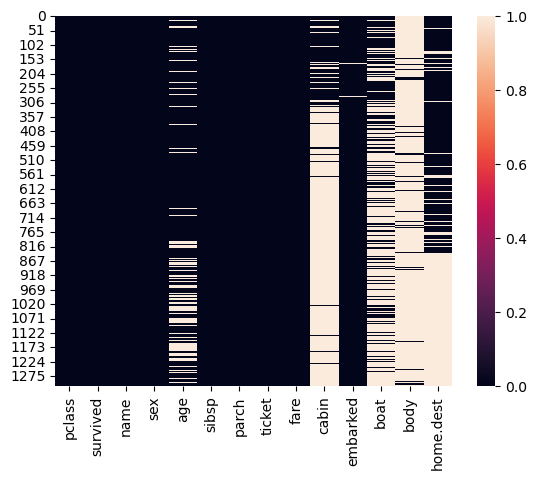

In [14]:
sns.heatmap(data.isnull())
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [24]:
data["age"].mode()[0]

24.0

In [27]:
data["age"].fillna(data["age"].mode()[0],inplace=True)

In [31]:
data["embarked"].mode()[0]

'S'

In [33]:
data["embarked"].fillna(data["embarked"].mode()[0],inplace=True)

In [36]:
data.select_dtypes(include="object").columns

Index(['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest'], dtype='object')

In [37]:
for i in data.select_dtypes(include="object").columns:
    data[i].fillna(data[i].mode()[0],inplace=True)

In [39]:
data.select_dtypes(include="float64").columns

Index(['age', 'fare', 'body'], dtype='object')

In [42]:
from sklearn.impute import SimpleImputer

In [44]:
si=SimpleImputer(strategy="mean")

In [46]:
ar=si.fit_transform(data[['age', 'fare', 'body']])

In [49]:
new_dataset=pd.DataFrame(ar,columns=[data.select_dtypes(include="float64").columns])

In [61]:
new_dataset.isnull().sum()

age     0
fare    0
body    0
dtype: int64

In [85]:
new_dataset

,age,fare,body
0,29.0000,211.3375,160.809917
1,0.9167,151.5500,160.809917
2,2.0000,151.5500,160.809917
3,30.0000,151.5500,135.000000
4,25.0000,151.5500,160.809917
...,...,...,...
1304,14.5000,14.4542,328.000000
1305,24.0000,14.4542,160.809917
1306,26.5000,7.2250,304.000000
1307,27.0000,7.2250,160.809917


In [52]:
print(data)

      pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare        cabin embarked  \
0     female  29.000

In [89]:
data.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         1
cabin        0
embarked     0
boat         0
home.dest    0
dtype: int64

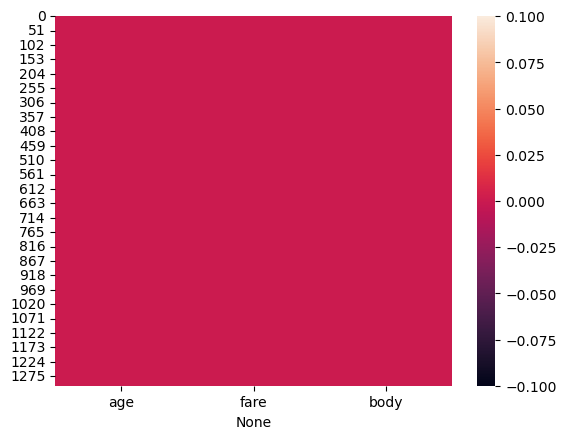

In [64]:
sns.heatmap(new_dataset.isnull())
plt.show()

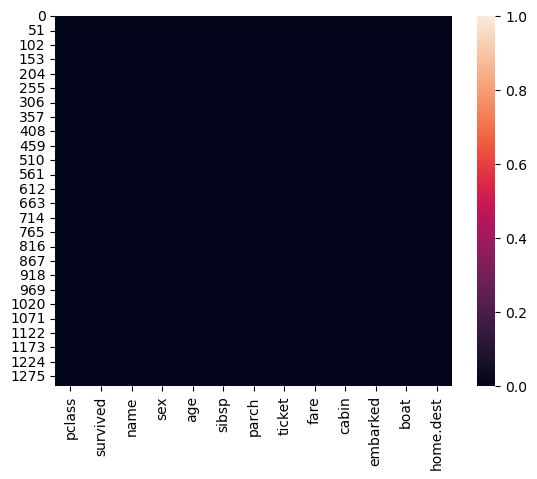

In [88]:
sns.heatmap(data.isnull())
plt.show()

In [87]:
print(data.columns)



Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'home.dest'],
      dtype='object')


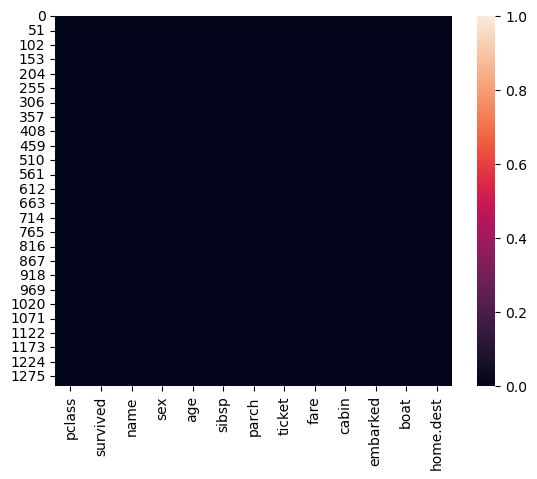

In [86]:
sns.heatmap(data.isnull())
plt.show()

In [91]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  home.dest  1309 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 133.1+ KB


In [92]:
data.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         1
cabin        0
embarked     0
boat         0
home.dest    0
dtype: int64

In [93]:
data["fare"].mode()[0]

8.05

In [94]:
data["fare"].fillna(data["fare"].mode()[0],inplace=True)

In [95]:
data.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
home.dest    0
dtype: int64

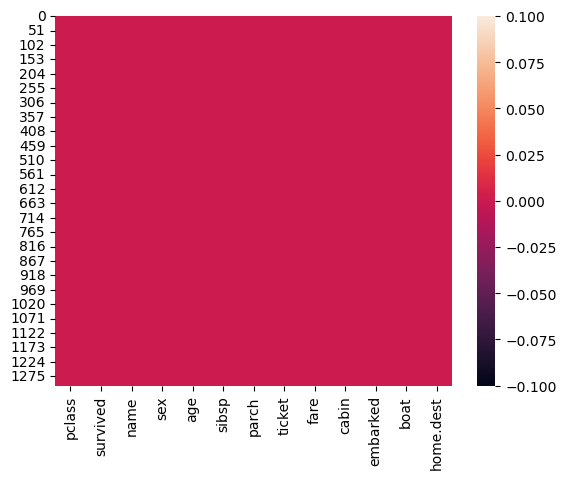

In [96]:
sns.heatmap(data.isnull())
plt.show()